<h1>Lab 9:Preprocessing Techniques in NLP Using NLTK package

# Preprocessing

In this lab, we will be exploring how to preprocess tweets for sentiment analysis. We will provide a function for preprocessing tweets during this week's assignment, but it is still good to know what is going on under the hood. By the end of this lab, you will see how to use the [NLTK](http://www.nltk.org) package to perform a preprocessing pipeline for Twitter datasets.

## Setup

In this lab, we will be using the [Natural Language Toolkit (NLTK)](http://www.nltk.org/howto/twitter.html) package, an open-source Python library for natural language processing. It has modules for collecting, handling, and processing Twitter data.

For this exercise, we will use a Twitter dataset that comes with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly. Let us import them now as well as a few other libraries we will be using.

In [1]:
#Import the necessary libraries
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import numpy as np

## About the Twitter dataset

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial. In a local computer however, you can download the data by doing:

In [2]:
# downloads sample twitter dataset. execute the line below if running on a local machine.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ikath\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [4]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'list'>


We can see that the data is stored in a list and as you might expect, individual tweets are stored as strings.

You can make a more visually appealing report by using Matplotlib's [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html) library. Let us see how to create a [pie chart](https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py) to show the same information as above. This simple snippet will serve you in future visualizations of this kind of data.

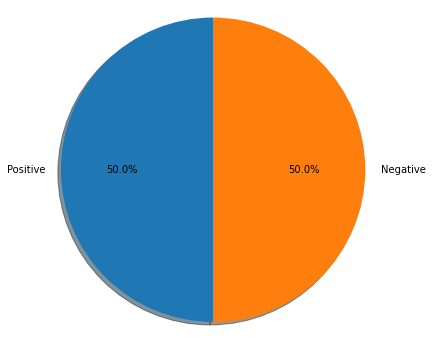

In [5]:
# PLOT the positive and negative tweets in a pie-chart
# Declare a figure with a custom size
fig = plt.figure(figsize=(6, 6))

# labels for the two classes
labels = 'Positive', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

## Looking at raw texts

Before anything else, we can print a couple of tweets from the dataset to see how they look. Understanding the data is responsible for 80% of the success or failure in data science projects. We can use this time to observe aspects we'd like to consider when preprocessing our data.

Below, you will print one random positive and one random negative tweet. We have added a color mark at the beginning of the string to further distinguish the two.

In [6]:
# Display a random tweet from positive and negative tweet.
# The size of positive and negative tweets are 5000 each. 
# Generate a random number between 0 and 5000 using random.randint()
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@Mhonchi_Savs  follow @jnlazts &amp; http://t.co/RCvcYYO0Iq follow u back :)
@WeeklyChris  Hello! ... :(


One observation you may have is the presence of [emoticons](https://en.wikipedia.org/wiki/Emoticon) and URLs in many of the tweets. This info will come in handy in the next steps.

## Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

The videos explained each of these steps and why they are important. Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.

In [7]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


Let's import a few more libraries for this purpose.

In [8]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ikath\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [9]:
#Import the necessary libraries
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [10]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenize the string

To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The [tokenize](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.casual) module from NLTK allows us to do these easily:

In [11]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [12]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts. 
These could be words like _i, not, between, because, won, against_. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...'  should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!

In [13]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

# Create the empty list to store the clean tweets after removing stopwords and punctuation
tweets_clean = []

# Remove stopwords and punctuation from the tweet_tokens
for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        
        # Append the clean word in the tweets_clean list
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Please note that the words **happy** and **sunny** in this list are correctly spelled. 

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [14]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word

    tweets_stem.append(stem_word)

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


That's it! Now we have a set of words we can feed into to the next stage of our machine learning project.

## process_tweet()

As shown above, preprocessing consists of multiple steps before you arrive at the final list of words. We will not ask you to replicate these however. You will use the function `process_tweet(tweet)` available below. 

To obtain the same result as in the previous code cells, you will only need to call the function `process_tweet()`. Let's do that in the next cell.

In [15]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [16]:
# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

tweets_stem = process_tweet(tweet)

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


# Building and Visualizing word frequencies


In this lab, we will focus on the `build_freqs()` helper function and visualizing a dataset fed into it. In our goal of tweet sentiment analysis, this function will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets. This will be very helpful when extracting the features of the dataset in the week's programming assignment. Let's see how this function is implemented under the hood in this notebook.

In [17]:
# Concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


Next, we will build a labels array that matches the sentiments of our tweets.  This data type works pretty much like a regular list but is optimized for computations and manipulation. The `labels` array will be composed of 10000 elements. The first 5000 will be filled with `1` labels denoting positive sentiments, and the next 5000 will be `0` labels denoting the opposite. We can do this easily with a series of operations provided by the `numpy` library:

* `np.ones()` - create an array of 1's
* `np.zeros()` - create an array of 0's
* `np.append()` - concatenate arrays

In [18]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

## Word frequency dictionary

Now that we know the building blocks, let's finally take a look at the **build_freqs()** function below. This is the function that creates the dictionary containing the word counts from each corpus.

In [19]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        # Iterate over all the words returned by calling the process_tweet() function for each tweet
        for word in process_tweet(tweet):
            pair = (word, y)
            # If pair matches in the dictionary, then increment the count of corresponding pair.
            if pair in freqs:
                freqs[pair] += 1
            else:
                # If pair does not matches in the dictionary, then set the count of corresponding pair as 1.
                freqs[pair] = 1

    # Return the dictionary
    return freqs

In [20]:
# Call the build_freqs function to create frequency dictionary based on tweets and labels
freqs = build_freqs(tweets, labels)

# Display the data type of freqs
print(f'type(freqs) = {type(freqs)}')

# Display the length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13067


In [21]:
# print all the key-value pair of frequency dictionary
for key, value in freqs.items():
    print(key, value)

('followfriday', 1.0) 25
('top', 1.0) 32
('engag', 1.0) 7
('member', 1.0) 16
('commun', 1.0) 33
('week', 1.0) 83
(':)', 1.0) 3568
('hey', 1.0) 76
('jame', 1.0) 7
('odd', 1.0) 2
(':/', 1.0) 5
('pleas', 1.0) 97
('call', 1.0) 37
('contact', 1.0) 7
('centr', 1.0) 2
('02392441234', 1.0) 1
('abl', 1.0) 8
('assist', 1.0) 1
('mani', 1.0) 33
('thank', 1.0) 620
('listen', 1.0) 16
('last', 1.0) 47
('night', 1.0) 68
('bleed', 1.0) 2
('amaz', 1.0) 51
('track', 1.0) 5
('scotland', 1.0) 2
('congrat', 1.0) 21
('yeaaah', 1.0) 1
('yipppi', 1.0) 1
('accnt', 1.0) 2
('verifi', 1.0) 2
('rqst', 1.0) 1
('succeed', 1.0) 1
('got', 1.0) 69
('blue', 1.0) 9
('tick', 1.0) 1
('mark', 1.0) 1
('fb', 1.0) 6
('profil', 1.0) 2
('15', 1.0) 5
('day', 1.0) 246
('one', 1.0) 129
('irresist', 1.0) 2
('flipkartfashionfriday', 1.0) 17
('like', 1.0) 233
('keep', 1.0) 68
('love', 1.0) 400
('custom', 1.0) 4
('wait', 1.0) 70
('long', 1.0) 36
('hope', 1.0) 141
('enjoy', 1.0) 75
('happi', 1.0) 211
('friday', 1.0) 116
('lwwf', 1.0) 1
(

('fluffi', 1.0) 1
('insid', 1.0) 8
('pirouett', 1.0) 1
('moos', 1.0) 1
('trip', 1.0) 14
('philli', 1.0) 1
('decemb', 1.0) 3
("i'd", 1.0) 20
('dude', 1.0) 6
('x41', 1.0) 1
('question', 1.0) 17
('flaw', 1.0) 1
('pain', 1.0) 9
('negat', 1.0) 1
('strength', 1.0) 3
('went', 1.0) 12
('solo', 1.0) 4
('move', 1.0) 12
('fav', 1.0) 13
('nirvana', 1.0) 1
('smell', 1.0) 2
('teen', 1.0) 3
('spirit', 1.0) 3
('rip', 1.0) 3
('ami', 1.0) 4
('winehous', 1.0) 1
('coupl', 1.0) 9
('tomhiddleston', 1.0) 1
('elizabetholsen', 1.0) 1
('yaytheylookgreat', 1.0) 1
('goodnight', 1.0) 24
('vid', 1.0) 11
('wake', 1.0) 12
('gonna', 1.0) 21
('shoot', 1.0) 6
('itti', 1.0) 2
('bitti', 1.0) 2
('teeni', 1.0) 2
('bikini', 1.0) 3
('much', 1.0) 89
('4th', 1.0) 4
('togeth', 1.0) 7
('end', 1.0) 20
('xfile', 1.0) 1
('content', 1.0) 4
('rain', 1.0) 21
('fabul', 1.0) 5
('fantast', 1.0) 13
('♡', 1.0) 20
('jb', 1.0) 1
('forev', 1.0) 5
('belieb', 1.0) 3
('nighti', 1.0) 1
('bug', 1.0) 3
('bite', 1.0) 1
('bracelet', 1.0) 2
('idea', 1.

('thermal', 1.0) 4
('imag', 1.0) 6
('survey', 1.0) 4
('–', 1.0) 14
('south', 1.0) 2
('korea', 1.0) 3
('scamper', 1.0) 1
('slept', 1.0) 4
('alarm', 1.0) 1
("ain't", 1.0) 5
('mad', 1.0) 4
('chweina', 1.0) 1
('xd', 1.0) 4
('jotzh', 1.0) 1
('wast', 1.0) 7
('place', 1.0) 21
('worth', 1.0) 11
('coat', 1.0) 3
('beforehand', 1.0) 1
('tho', 1.0) 12
('foh', 1.0) 2
('outsid', 1.0) 5
('holiday', 1.0) 11
('menac', 1.0) 1
('jojo', 1.0) 2
('ta', 1.0) 2
('accept', 1.0) 1
('admin', 1.0) 2
('lukri', 1.0) 1
('😘', 1.0) 10
('momma', 1.0) 2
('bear', 1.0) 2
('❤', 1.0) 29
('️', 1.0) 20
('redid', 1.0) 1
('8th', 1.0) 1
('v.ball', 1.0) 1
('atm', 1.0) 4
('build', 1.0) 8
('pack', 1.0) 8
('suitcas', 1.0) 2
('hang-copi', 1.0) 1
('translat', 1.0) 1
("dostoevsky'", 1.0) 1
('voucher', 1.0) 2
('bugatti', 1.0) 1
('bra', 1.0) 3
('مطعم_هاشم', 1.0) 1
('yummi', 1.0) 3
('a7la', 1.0) 1
('bdayt', 1.0) 1
('mnwreeen', 1.0) 1
('jazz', 1.0) 2
('truck', 1.0) 1
('x34', 1.0) 1
('speak', 1.0) 8
('pbevent', 1.0) 1
('hq', 1.0) 1
('add', 

('daniel', 1.0) 2
('ape', 1.0) 1
('saar', 1.0) 1
('ahead', 1.0) 4
('vers', 1.0) 1
('butterfli', 1.0) 1
('bonu', 1.0) 2
('fill', 1.0) 5
('tear', 1.0) 1
('laughter', 1.0) 2
('5so', 1.0) 6
('yummmyyi', 1.0) 1
('eat', 1.0) 6
('dosa', 1.0) 1
('easier', 1.0) 2
('unless', 1.0) 3
('achi', 1.0) 2
('youuu', 1.0) 2
('bawi', 1.0) 1
('ako', 1.0) 1
('queenesth', 1.0) 1
('sharp', 1.0) 2
('yess', 1.0) 1
('poldi', 1.0) 1
('cimbom', 1.0) 1
('buddi', 1.0) 7
('bruhhh', 1.0) 1
('daddi', 1.0) 2
('”', 1.0) 5
('knowledg', 1.0) 2
('attent', 1.0) 4
('1tb', 1.0) 1
('bank', 1.0) 1
('credit', 1.0) 4
('depart', 1.0) 2
('anz', 1.0) 1
('extrem', 1.0) 3
('offshor', 1.0) 1
('absolut', 1.0) 9
('classic', 1.0) 3
('gottolovebank', 1.0) 1
('yup', 1.0) 6
('in-shaa-allah', 1.0) 1
('dua', 1.0) 1
('thru', 1.0) 2
('aameen', 1.0) 2
('4/5', 1.0) 1
('coca', 1.0) 1
('cola', 1.0) 1
('fanta', 1.0) 1
('pepsi', 1.0) 1
('sprite', 1.0) 1
('all', 1.0) 1
('sweeeti', 1.0) 1
(';-)', 1.0) 3
('welcometweet', 1.0) 2
('psygustokita', 1.0) 4
('se

('2017', 1.0) 1
('jumma', 1.0) 5
('mubarik', 1.0) 2
('spent', 1.0) 2
('congratz', 1.0) 1
('contribut', 1.0) 3
('2.0', 1.0) 2
('yuppiiee', 1.0) 1
('alienthought', 1.0) 1
('happyalien', 1.0) 1
('crowd', 1.0) 2
('loudest', 1.0) 2
('gari', 1.0) 1
('particular', 1.0) 1
('attract', 1.0) 1
('supprt', 1.0) 1
('savag', 1.0) 1
('cleans', 1.0) 1
('scam', 1.0) 1
('ridden', 1.0) 1
('vyapam', 1.0) 2
('renam', 1.0) 1
('wave', 1.0) 2
('couch', 1.0) 1
('dodg', 1.0) 1
('explan', 1.0) 2
('bag', 1.0) 4
('sanza', 1.0) 1
('yaa', 1.0) 3
('slr', 1.0) 1
('som', 1.0) 1
('honour', 1.0) 1
('heheh', 1.0) 1
('view', 1.0) 16
('explor', 1.0) 2
('wayanadan', 1.0) 1
('forest', 1.0) 1
('wayanad', 1.0) 1
('srijith', 1.0) 1
('whisper', 1.0) 1
('lie', 1.0) 4
('pokemon', 1.0) 1
('dazzl', 1.0) 1
('urself', 1.0) 2
('doubl', 1.0) 2
('flare', 1.0) 1
('black', 1.0) 4
('9', 1.0) 3
('51', 1.0) 1
('brows', 1.0) 1
('bore', 1.0) 9
('femal', 1.0) 2
('tour', 1.0) 8
('delv', 1.0) 2
('muchhh', 1.0) 1
('tmr', 1.0) 1
('breakfast', 1.0) 4
(

('popular', 1.0) 2
('charismat', 1.0) 1
('man.h', 1.0) 1
('thrive', 1.0) 1
('economi', 1.0) 1
('burst', 1.0) 2
('georgi', 1.0) 1
('x26', 1.0) 1
('million', 1.0) 4
('fl', 1.0) 1
('kindest', 1.0) 2
('iceland', 1.0) 1
('crazi', 1.0) 4
('landscap', 1.0) 2
('yok', 1.0) 1
('lah', 1.0) 1
('concordia', 1.0) 1
('reunit', 1.0) 1
('xxxibmchll', 1.0) 1
('sea', 1.0) 4
('prettier', 1.0) 2
('imitatia', 1.0) 1
('oe', 1.0) 1
('michel', 1.0) 1
('comeback', 1.0) 1
('gross', 1.0) 1
('treat', 1.0) 5
('equal', 1.0) 2
('injustic', 1.0) 1
('femin', 1.0) 1
('ineedfeminismbecaus', 1.0) 1
('forgotten', 1.0) 3
('stuck', 1.0) 4
('recommend', 1.0) 4
('redhead', 1.0) 1
('wacki', 1.0) 1
('rather', 1.0) 5
('waytoliveahappylif', 1.0) 1
('hoxton', 1.0) 1
('holborn', 1.0) 1
('karen', 1.0) 2
('wag', 1.0) 2
('bum', 1.0) 1
('wwooo', 1.0) 1
('nite', 1.0) 3
('laiten', 1.0) 1
('arond', 1.0) 1
('1:30', 1.0) 1
('consid', 1.0) 3
('matur', 1.0) 3
('journeyp', 1.0) 2
('foam', 1.0) 1
("lady'", 1.0) 1
('mob', 1.0) 1
('fals', 1.0) 1
(

('cala', 1.0) 1
('brush', 1.0) 1
('ego', 1.0) 1
('wherev', 1.0) 1
('interact', 1.0) 2
('dongsaeng', 1.0) 1
('chorong', 1.0) 1
('friendship', 1.0) 1
('impress', 1.0) 3
('dragon', 1.0) 2
('duck', 1.0) 5
('mix', 1.0) 5
('cheetah', 1.0) 1
('wagga', 1.0) 2
('coursework', 1.0) 1
('lorna', 1.0) 1
('scan', 1.0) 1
('x12', 1.0) 2
('canva', 1.0) 2
('iqbal', 1.0) 1
('ima', 1.0) 1
('hon', 1.0) 1
('aja', 1.0) 1
('besi', 1.0) 1
('chati', 1.0) 1
('phulani', 1.0) 1
('swasa', 1.0) 1
('bahari', 1.0) 1
('jiba', 1.0) 1
('mumbai', 1.0) 1
('gujarat', 1.0) 1
('distrub', 1.0) 1
('otherwis', 1.0) 5
('190cr', 1.0) 1
('inspit', 1.0) 1
('highest', 1.0) 1
('holder', 1.0) 1
('threaten', 1.0) 1
('daili', 1.0) 2
('basi', 1.0) 1
('vr', 1.0) 1
('angelo', 1.0) 1
('quezon', 1.0) 1
('sweatpant', 1.0) 1
('farbridg', 1.0) 1
('segalakatakata', 1.0) 1
('nixu', 1.0) 1
('begun', 1.0) 1
('flint', 1.0) 1
('🍰', 1.0) 5
('separ', 1.0) 1
('criticis', 1.0) 1
('gestur', 1.0) 1
('pedal', 1.0) 1
('stroke', 1.0) 1
('caro', 1.0) 1
('deposit

('chillin', 1.0) 2
('tail', 1.0) 2
('kitten', 1.0) 1
('garret', 1.0) 1
('baz', 1.0) 1
('leo', 1.0) 2
('xst', 1.0) 1
('centrifug', 1.0) 1
('etern', 1.0) 3
('forgiv', 1.0) 2
('kangin', 1.0) 1
('بندر', 1.0) 1
('العنزي', 1.0) 1
('kristin', 1.0) 1
('cass', 1.0) 1
('surajettan', 1.0) 1
('kashi', 1.0) 1
('ashwathi', 1.0) 1
('mommi', 1.0) 2
('tirth', 1.0) 1
('brambhatt', 1.0) 1
('snooker', 1.0) 1
('compens', 1.0) 1
('theoper', 1.0) 1
('479', 1.0) 1
('premiostumundo', 1.0) 2
('philosoph', 1.0) 1
('x5', 1.0) 1
('graphic', 1.0) 2
('level', 1.0) 1
('aug', 1.0) 3
('excl', 1.0) 1
('raw', 1.0) 1
('weeni', 1.0) 1
('annoyingbabi', 1.0) 1
('lazi', 1.0) 2
('cosi', 1.0) 1
('client_amends_edit', 1.0) 1
('_5_final_final_fin', 1.0) 1
('pdf', 1.0) 1
('mauliat', 1.0) 1
('ito', 1.0) 2
('okkay', 1.0) 1
('knock', 1.0) 3
("soloist'", 1.0) 1
('ryu', 1.0) 1
('saera', 1.0) 1
('pinkeu', 1.0) 1
('angri', 1.0) 3
('screencap', 1.0) 1
('jonghyun', 1.0) 1
('seungyeon', 1.0) 1
('cnblue', 1.0) 1
('mbc', 1.0) 1
('wgm', 1.0) 1

('unives', 1.0) 1
('architectur', 1.0) 1
('random', 1.0) 1
('isnt', 1.0) 1
('typo', 1.0) 1
('snark', 1.0) 1
('lession', 1.0) 1
('drunk', 1.0) 1
('bruuh', 1.0) 1
('2week', 1.0) 1
('50europ', 1.0) 1
('🇫', 1.0) 4
('🇷', 1.0) 4
('iov', 1.0) 1
('accord', 1.0) 1
('mne', 1.0) 1
('pchelok', 1.0) 1
('ja', 1.0) 1
('=:', 1.0) 2
('sweetest', 1.0) 1
('comet', 1.0) 1
('ahah', 1.0) 1
('candi', 1.0) 2
('axio', 1.0) 1
('rabbit', 1.0) 2
('nutshel', 1.0) 1
('taken', 1.0) 1
('letshavecocktailsafternuclai', 1.0) 1
('malik', 1.0) 1
('umair', 1.0) 1
('canon', 1.0) 1
('gang', 1.0) 1
('grind', 1.0) 1
('thoracicbridg', 1.0) 1
('5minut', 1.0) 1
('nonscript', 1.0) 1
('password', 1.0) 1
('shoshannavassil', 1.0) 1
('addmeonsnapchat', 1.0) 1
('dmme', 1.0) 1
('mpoint', 1.0) 2
('soph', 1.0) 1
('anot', 1.0) 1
('liao', 1.0) 2
('ord', 1.0) 1
('lor', 1.0) 1
('sibei', 1.0) 1
('xialan', 1.0) 1
('thnx', 1.0) 1
('malfunct', 1.0) 1
('clown', 1.0) 1
('joker', 1.0) 1
('\U000fec00', 1.0) 1
('nigth', 1.0) 1
('estoy', 1.0) 1
('escuc

('purpl', 1.0) 1
("chippy'", 1.0) 1
('vessel', 1.0) 1
('ps', 1.0) 2
('vintag', 1.0) 1
('✫', 1.0) 4
('˚', 1.0) 4
('·', 1.0) 4
('✵', 1.0) 4
('⊹', 1.0) 4
('1710', 1.0) 1
('gooffeanotter', 1.0) 1
('kiksex', 1.0) 1
('mugshot', 1.0) 1
('token', 1.0) 1
('maritimen', 1.0) 1
('rh', 1.0) 1
('tatton', 1.0) 1
('jump_julia', 1.0) 1
('malema', 1.0) 1
('fren', 1.0) 1
('nuf', 1.0) 1
('teas', 1.0) 1
('alien', 1.0) 2
('closer', 1.0) 1
('monitor', 1.0) 1
('kimmi', 1.0) 1
("channel'", 1.0) 1
('planetbollywoodnew', 1.0) 1
('epi', 1.0) 1
('tricki', 1.0) 1
('be-shak', 1.0) 1
('chenoweth', 1.0) 1
('oodl', 1.0) 1
('hailey', 1.0) 1
('craźi', 1.0) 1
('sęxxxÿ', 1.0) 1
('cøôl', 1.0) 1
('runway', 1.0) 1
('gooodnight', 1.0) 1
('iv', 1.0) 1
('ri', 1.0) 1
('jayci', 1.0) 1
('karaok', 1.0) 1
('ltsw', 1.0) 1
('giant', 1.0) 1
('1709', 1.0) 1
('refus', 1.0) 1
('collagen', 1.0) 1
('2win', 1.0) 1
('hopetowin', 1.0) 1
('inventori', 1.0) 1
('loveforfood', 1.0) 1
('foodforthought', 1.0) 1
('thoughtfortheday', 1.0) 1
('carp', 1.

('ehn', 0.0) 1
('arrest', 0.0) 1
('girlfriend', 0.0) 2
('he', 0.0) 3
('nice', 0.0) 19
('person', 0.0) 15
('idk', 0.0) 26
('anybodi', 0.0) 7
('song', 0.0) 27
('disappear', 0.0) 1
('itun', 0.0) 3
('daze', 0.0) 1
('confus', 0.0) 8
('surviv', 0.0) 5
('fragment', 0.0) 1
("would'v", 0.0) 2
('forc', 0.0) 2
('horribl', 0.0) 9
('weather', 0.0) 29
('us', 0.0) 43
('could', 0.0) 69
('walao', 0.0) 1
('kb', 0.0) 1
('send', 0.0) 12
('ill', 0.0) 16
('djderek', 0.0) 1
('mani', 0.0) 29
('fun', 0.0) 32
('gig', 0.0) 3
('absolut', 0.0) 6
('legend', 0.0) 3
('wait', 0.0) 43
('till', 0.0) 8
('saturday', 0.0) 10
('homework', 0.0) 2
('pa', 0.0) 8
('made', 0.0) 23
('da', 0.0) 5
('greek', 0.0) 2
('tragedi', 0.0) 1
('rain', 0.0) 43
('gym', 0.0) 6
('💪', 0.0) 2
('🏻', 0.0) 4
('🐒', 0.0) 1
('what', 0.0) 8
('wrong', 0.0) 33
('struck', 0.0) 1
('anymor', 0.0) 20
('belgium', 0.0) 4
('fabian', 0.0) 2
('delph', 0.0) 6
('fallen', 0.0) 3
('hide', 0.0) 4
('drake', 0.0) 1
('silent', 0.0) 1
('hear', 0.0) 33
('rest', 0.0) 21
('pea

('kik', 0.0) 69
('thelock', 0.0) 1
('76', 0.0) 1
('sex', 0.0) 6
('omegl', 0.0) 4
('coupl', 0.0) 2
('travel', 0.0) 11
('hotgirl', 0.0) 2
('2009', 0.0) 1
('3', 0.0) 37
('ghantay', 0.0) 1
('light', 0.0) 8
('nai', 0.0) 1
('hay', 0.0) 8
('deni', 0.0) 1
('ruin', 0.0) 11
('laguna', 0.0) 1
('exit', 0.0) 2
('gomen', 0.0) 1
('heck', 0.0) 5
('fair', 0.0) 12
('grew', 0.0) 2
('half', 0.0) 10
('inch', 0.0) 2
('two', 0.0) 19
('problem', 0.0) 7
('suuuper', 0.0) 1
('65', 0.0) 1
('sale', 0.0) 8
('inact', 0.0) 8
('orphan', 0.0) 1
('black', 0.0) 12
('earlier', 0.0) 9
('whaaat', 0.0) 5
('kaya', 0.0) 2
('naaan', 0.0) 1
('paus', 0.0) 1
('randomli', 0.0) 1
('app', 0.0) 13
('3:30', 0.0) 1
('walk', 0.0) 7
('inglewood', 0.0) 1
('ummm', 0.0) 4
('anxieti', 0.0) 3
('readi', 0.0) 12
('also', 0.0) 19
('charcoal', 0.0) 1
('til', 0.0) 5
('mid-end', 0.0) 1
('aug', 0.0) 1
('noooo', 0.0) 1
('heard', 0.0) 6
('rip', 0.0) 12
('rodfanta', 0.0) 1
('wasp', 0.0) 2
('sting', 0.0) 1
('avert', 0.0) 1
('bug', 0.0) 3
('(:', 0.0) 7
('

('side', 0.0) 6
('cs', 0.0) 2
('own', 0.0) 1
('walnut', 0.0) 1
('whip', 0.0) 1
('wife', 0.0) 6
('boah', 0.0) 1
('madi', 0.0) 2
('def', 0.0) 3
('manga', 0.0) 1
('giant', 0.0) 3
('aminormalyet', 0.0) 1
('cooki', 0.0) 2
('breakfast', 0.0) 5
('clutch', 0.0) 1
('poorli', 0.0) 6
('tummi', 0.0) 6
('pj', 0.0) 1
('groan', 0.0) 1
('nou', 0.0) 1
('adam', 0.0) 2
('ken', 0.0) 1
('sara', 0.0) 2
('sister', 0.0) 4
('accid', 0.0) 2
('sort', 0.0) 7
('mate', 0.0) 2
('pick', 0.0) 12
('rang', 0.0) 4
('fk', 0.0) 2
('freak', 0.0) 5
('describ', 0.0) 1
('eric', 0.0) 2
('prydz', 0.0) 1
('sister-in-law', 0.0) 1
('instal', 0.0) 2
('seat', 0.0) 4
('bought', 0.0) 6
('rear-end', 0.0) 1
("everyone'", 0.0) 4
('trash', 0.0) 2
('boob', 0.0) 3
('whilst', 0.0) 3
('stair', 0.0) 1
('childhood', 0.0) 1
('toothsensit', 0.0) 4
('size', 0.0) 9
('ke', 0.0) 3
('shem', 0.0) 2
('trust', 0.0) 2
('awel', 0.0) 1
('drunk', 0.0) 2
('weekendofmad', 0.0) 1
('🍹', 0.0) 3
('🍸', 0.0) 1
('cb', 0.0) 1
('dancer', 0.0) 1
('choregraph', 0.0) 1
('6

('findavip', 0.0) 1
('boyirl', 0.0) 1
('yasss', 0.0) 1
('6th', 0.0) 1
('june', 0.0) 3
('lain', 0.0) 1
('diffici', 0.0) 1
('custom', 0.0) 1
('internet', 0.0) 9
('near', 0.0) 9
('speed', 0.0) 2
('escap', 0.0) 1
('rapist', 0.0) 1
('commit', 0.0) 2
('crime', 0.0) 1
('bachpan', 0.0) 1
('ki', 0.0) 2
('yaadein', 0.0) 1
('finnair', 0.0) 1
('heathrow', 0.0) 1
('norwegian', 0.0) 1
(':\\', 0.0) 1
('batteri', 0.0) 3
('upvot', 0.0) 4
('keeno', 0.0) 1
('whatthefuck', 0.0) 1
('grotti', 0.0) 1
('attent', 0.0) 1
('seeker', 0.0) 1
('moral', 0.0) 1
('fern', 0.0) 1
('mimi', 0.0) 1
('bali', 0.0) 1
('she', 0.0) 4
('pleasee', 0.0) 3
('brb', 0.0) 1
('lowbat', 0.0) 1
('otwolgrandtrail', 0.0) 4
('funk', 0.0) 1
('wewanticecream', 0.0) 1
('sweat', 0.0) 2
('eugh', 0.0) 1
('speak', 0.0) 4
('occasion', 0.0) 1
("izzy'", 0.0) 1
('dorm', 0.0) 1
('choppi', 0.0) 1
('paul', 0.0) 1
('switch', 0.0) 4
("infinite'", 0.0) 2
('5:30', 0.0) 2
('cayton', 0.0) 1
('bay', 0.0) 2
('emma', 0.0) 2
('jen', 0.0) 1
('darcey', 0.0) 1
('conn

('veget', 0.0) 1
('puke', 0.0) 2
('deliri', 0.0) 1
('motilium', 0.0) 1
('shite', 0.0) 1
('318', 0.0) 1
('schoolwork', 0.0) 1
("phoebe'", 0.0) 1
('317', 0.0) 1
('pothol', 0.0) 1
('316', 0.0) 1
('notif', 0.0) 3
('1,300', 0.0) 1
('robyn', 0.0) 1
('necklac', 0.0) 1
('rachel', 0.0) 1
('bhai', 0.0) 1
('ramzan', 0.0) 1
('crosss', 0.0) 1
('clapham', 0.0) 1
('investig', 0.0) 2
('sth', 0.0) 1
('essenti', 0.0) 1
('photoshooot', 0.0) 1
('austin', 0.0) 1
('mahon', 0.0) 1
('shut', 0.0) 3
('andam', 0.0) 1
('memor', 0.0) 1
('cotton', 0.0) 1
('candi', 0.0) 3
('stock', 0.0) 3
('swallow', 0.0) 1
('snot', 0.0) 1
('choke', 0.0) 1
('taknottem', 0.0) 1
('477', 0.0) 1
('btob', 0.0) 2
('percentag', 0.0) 1
('shoshannavassil', 0.0) 1
('swift', 0.0) 1
('flat', 0.0) 3
('a9', 0.0) 2
('wsalelov', 0.0) 5
('sexyjan', 0.0) 1
('horni', 0.0) 2
('goodmus', 0.0) 4
('debut', 0.0) 3
('lart', 0.0) 1
('sew', 0.0) 1
('skyfal', 0.0) 1
('premier', 0.0) 1
('yummi', 0.0) 2
('manteca', 0.0) 1
("she'd", 0.0) 2
('probabl', 0.0) 8
('sh

('creepi', 0.0) 2
('josh', 0.0) 1
('boohoo', 0.0) 1
('fellow', 0.0) 2
('tweep', 0.0) 1
('roar', 0.0) 1
('victori', 0.0) 1
('tweepsmatchout', 0.0) 1
('nein', 0.0) 3
('404', 0.0) 1
('midnight', 0.0) 2
('willlow', 0.0) 1
('hbd', 0.0) 1
('sowwi', 0.0) 1
('3000', 0.0) 1
('grind', 0.0) 1
('gear', 0.0) 1
('0.001', 0.0) 1
('meant', 0.0) 6
('portrait', 0.0) 1
('mode', 0.0) 2
('fact', 0.0) 4
('11:11', 0.0) 4
('shanzay', 0.0) 1
('salabrati', 0.0) 1
('journo', 0.0) 1
('lure', 0.0) 1
('gang', 0.0) 1
('twist', 0.0) 1
('mashaket', 0.0) 1
('pet', 0.0) 2
('bapak', 0.0) 1
('royal', 0.0) 2
('prima', 0.0) 1
('mune', 0.0) 1
('874', 0.0) 1
('plisss', 0.0) 1
('elf', 0.0) 1
('teenchoic', 0.0) 5
('choiceinternationalartist', 0.0) 5
('superjunior', 0.0) 5
("he'll", 0.0) 1
('sunway', 0.0) 1
('petal', 0.0) 1
('jaya', 0.0) 1
('selangor', 0.0) 1
('glow', 0.0) 1
('huhuu', 0.0) 1
('congratul', 0.0) 2
('margo', 0.0) 1
('konga', 0.0) 1
('ni', 0.0) 4
('wa', 0.0) 2
('ode', 0.0) 1
('disvirgin', 0.0) 1
('bride', 0.0) 3
('y

('whhr', 0.0) 1
('juan', 0.0) 1
('snuggl', 0.0) 1
('internship', 0.0) 1
('usag', 0.0) 1
('warn', 0.0) 1
('vertigo', 0.0) 1
('panic', 0.0) 1
('attack', 0.0) 4
('dual', 0.0) 1
('carriageway', 0.0) 1
('aragalang', 0.0) 1
('08', 0.0) 1
('tam', 0.0) 1
('bose', 0.0) 1
('theo', 0.0) 1
('anymoree', 0.0) 1
('rubbish', 0.0) 1
('cactu', 0.0) 1
('sorrri', 0.0) 1
('bowel', 0.0) 1
('nasti', 0.0) 2
('tumour', 0.0) 1
('faster', 0.0) 1
('puffi', 0.0) 1
('eyelid', 0.0) 1
('musica', 0.0) 1
('dota', 0.0) 1
('4am', 0.0) 1
('campsit', 0.0) 1
('miah', 0.0) 1
('hahay', 0.0) 1
('churro', 0.0) 1
('montana', 0.0) 2
('reign', 0.0) 1
('exampl', 0.0) 1
('inflat', 0.0) 1
('sic', 0.0) 1
('reset', 0.0) 1
('entlerbountli', 0.0) 1
('tinder', 0.0) 3
('dirtykik', 0.0) 2
('sexcam', 0.0) 3
('spray', 0.0) 1
('industri', 0.0) 1
('swollen', 0.0) 1
('distanc', 0.0) 2
('jojo', 0.0) 1
('postcod', 0.0) 1
('kafi', 0.0) 1
('din', 0.0) 1
('mene', 0.0) 1
('aj', 0.0) 1
('koi', 0.0) 1
('rewert', 0.0) 1
('bunta', 0.0) 1
('warnaaa', 0.0) 

('chrome', 0.0) 1
('voiceov', 0.0) 1
('devo', 0.0) 1
('hulkhogan', 0.0) 1
('unpleas', 0.0) 1
('daaamn', 0.0) 1
('dada', 0.0) 1
('fulli', 0.0) 1
('spike', 0.0) 1
("panic'", 0.0) 1
('22nd', 0.0) 1
('south', 0.0) 2
('africa', 0.0) 2
('190', 0.0) 2
('lizardz', 0.0) 1
('deepli', 0.0) 1
('emerg', 0.0) 1
('engin', 0.0) 1
('dormtel', 0.0) 1
('scho', 0.0) 1
('siya', 0.0) 1
('onee', 0.0) 1
('carri', 0.0) 1
('7pm', 0.0) 1
('feta', 0.0) 1
('blaaaz', 0.0) 1
('nausea', 0.0) 1
('awar', 0.0) 1
('top-up', 0.0) 1
('sharknado', 0.0) 1
('erni', 0.0) 1
('ezoo', 0.0) 1
('lilybutl', 0.0) 1
('seduc', 0.0) 2
('powai', 0.0) 1
('neighbor', 0.0) 1
('delhi', 0.0) 1
('unsaf', 0.0) 1
('halo', 0.0) 1
('fred', 0.0) 1
('gaon', 0.0) 1
('infnt', 0.0) 1
('elig', 0.0) 1
('acub', 0.0) 1
("why'd", 0.0) 1
('bullshit', 0.0) 2
('hanaaa', 0.0) 1
('jn', 0.0) 1
('tau', 0.0) 1
('basta', 0.0) 1
('sext', 0.0) 1
('addm', 0.0) 1
('hotmusicdeloco', 0.0) 2
('dhi', 0.0) 1
('👉', 0.0) 1
('8ball', 0.0) 1
('fakmarey', 0.0) 1
('doo', 0.0) 2
('

('fikri', 0.0) 1
('tirtagangga', 0.0) 1
('char', 0.0) 1
('font', 0.0) 2
('riprishikeshwari', 0.0) 1
('creamist', 0.0) 1
('challeng', 0.0) 1
('substitut', 0.0) 1
('skin', 0.0) 1
('cplt', 0.0) 1
('cp', 0.0) 1
('hannah', 0.0) 1
('💙', 0.0) 1
('opu', 0.0) 1
('inner', 0.0) 1
('pleasur', 0.0) 1
('bbq', 0.0) 1
('33', 0.0) 1
('lolliv', 0.0) 1
('split', 0.0) 3
('collat', 0.0) 2
('spilt', 0.0) 2
('quitkarwaoyaaro', 0.0) 1
('deacti̇v', 0.0) 1
('2.5', 0.0) 1
('g2a', 0.0) 1
('sherep', 0.0) 1
('nemen', 0.0) 1
('behey', 0.0) 1
('motherfuck', 0.0) 1
('tattoo', 0.0) 1
('reec', 0.0) 1
('vm', 0.0) 1
('deth', 0.0) 2
('lest', 0.0) 1
('gp', 0.0) 1
('departur', 0.0) 1
('wipe', 0.0) 1
('yuck', 0.0) 1
('ystrday', 0.0) 1
('seolhyun', 0.0) 1
('drama', 0.0) 1
('spici', 0.0) 1
('owl', 0.0) 1
('mumbai', 0.0) 1
("pj'", 0.0) 1
('wallpap', 0.0) 1
('cba', 0.0) 1
('hotter', 0.0) 1
('rec', 0.0) 1
('gotdamn', 0.0) 1
('baaack', 0.0) 1
('honest', 0.0) 1
('srw', 0.0) 1
('mobag', 0.0) 1
('dunno', 0.0) 1
('stroke', 0.0) 1
('gnr

Unfortunately, this does not help much to understand the data. It would be better to visualize this output to gain better insights.

## Table of word counts

We will select a set of words that we would like to visualize. It is better to store this temporary information in a table that is very easy to use later.

In [22]:
# Select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad',
        'mad', 'best', 'pretti', '❤', ':)', ':(', '😒',
        '😬', '😄', '😍', '♛', 'song', 'idea', 'power',
        'play', 'magnific']

# Create the empty list as list representing our table of word counts, where 
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>].
data = []

# Iterate over each word in keys
for word in keys:
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

We can then use a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. `:)` has 3568 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral. 

c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128556 missing from current font.
  font.set_text(s, 0, flags=flags)


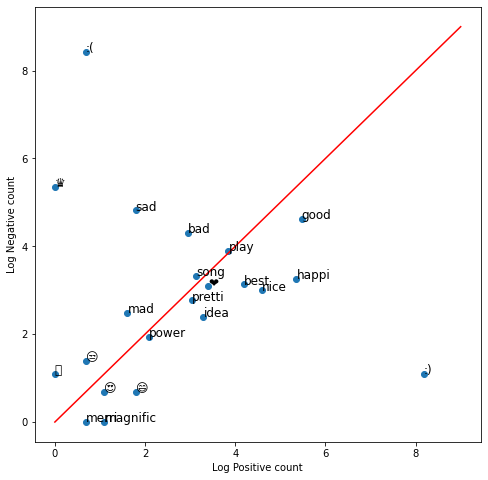

In [23]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

This chart is straightforward to interpret. It shows that emoticons `:)` and `:(` are very important for sentiment analysis. Thus, we should not let preprocessing steps get rid of these symbols!

Furthermore, what is the meaning of the crown symbol? It seems to be very negative!

## Create a features for the twitter dataset and Apply any machine learning algorithm to classify the tweets and check the accuracy of your model. Try with Logistic Regression for Classification 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
X = tweets
y = labels
print(len(tweets), len(labels))

10000 10000


In [26]:
vectorizer = CountVectorizer(
    analyzer = 'word',
    lowercase = False,
)

features = vectorizer.fit_transform(
    tweets
)

features_nd = features.toarray() # for easy usage

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features_nd, y, test_size=0.33, random_state=42)

In [28]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [30]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7721212121212121


In [33]:
import pandas as pd
pd.DataFrame({'True': y_test, 'Pred': y_pred})

,True,Pred
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
3295,1.0,1.0
3296,0.0,0.0
3297,0.0,0.0
3298,0.0,0.0
